In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('customer_churn_dataset-training-master.csv')
test = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [3]:
test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [4]:
train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [5]:
print(train.equals(test))

False


In [6]:
train.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [8]:
data = pd.concat([train,test]).drop_duplicates().reset_index(drop=True)

In [9]:
data.columns[data.isnull().any()]

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [10]:
data[data['CustomerID'].isnull()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data = data[data['CustomerID'].notnull()]

In [12]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [13]:
# data = data.copy()
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})
data['Subscription Type'] = data['Subscription Type'].replace({'Basic':1, 'Standard':2, 'Premium':3})
data['Contract Length'] = data['Contract Length'].replace({'Monthly':1, 'Quarterly':2, 'Annual':3})

In [14]:
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,3,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,1,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,1,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,1,1,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,0,33.0,12.0,6.0,21.0,1,2,947.0,14.0,1.0
505203,64371.0,37.0,1,6.0,1.0,5.0,22.0,2,3,923.0,9.0,1.0
505204,64372.0,25.0,1,39.0,14.0,8.0,30.0,3,1,327.0,20.0,1.0
505205,64373.0,50.0,0,18.0,19.0,7.0,22.0,2,1,540.0,13.0,1.0


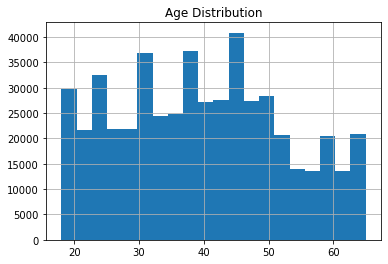

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


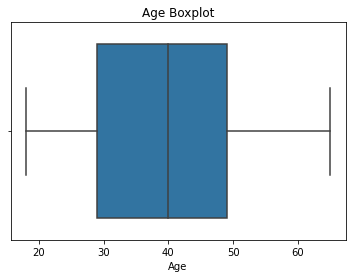

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

sns.boxplot(data['Age'])
plt.title('Age Boxplot')
plt.show()

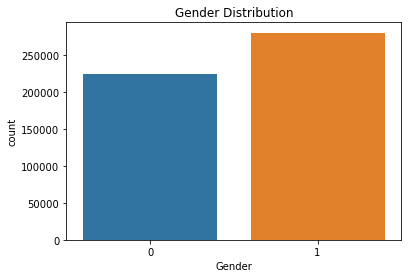

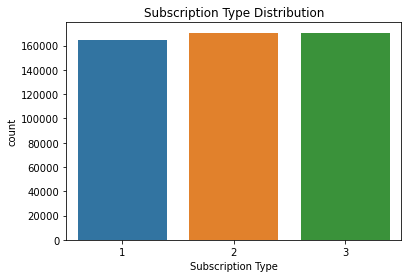

In [16]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Subscription Type', data=data)
plt.title('Subscription Type Distribution')
plt.show()

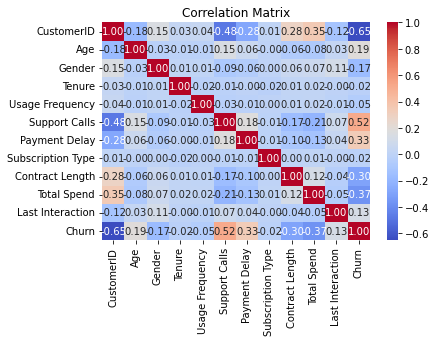

In [17]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
pd.crosstab(data['Gender'], data['Subscription Type'])

Subscription Type,1,2,3
Gender,,,
0,73440,76119,75374
1,91037,94511,94725


In [19]:
duplicates = data.duplicated()
print(data[duplicates])

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []


In [20]:
list(data.Gender.unique())

[0, 1]

In [22]:
data.columns = data.columns.str.replace(' ', '_')

In [65]:
# list(data.Subscription_Type.unique())
list(data['Subscription_Type'].unique())

[2, 1, 3]

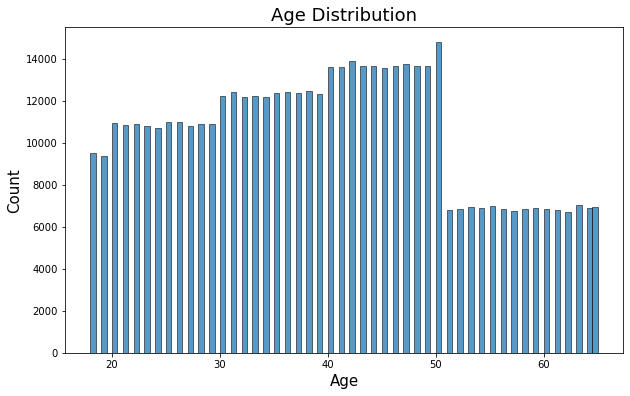

In [25]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

plt.figure(figsize=(10,6))
sns.histplot(data.Age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=15) #font size
plt.ylabel('Count',size=15)
plt.show()

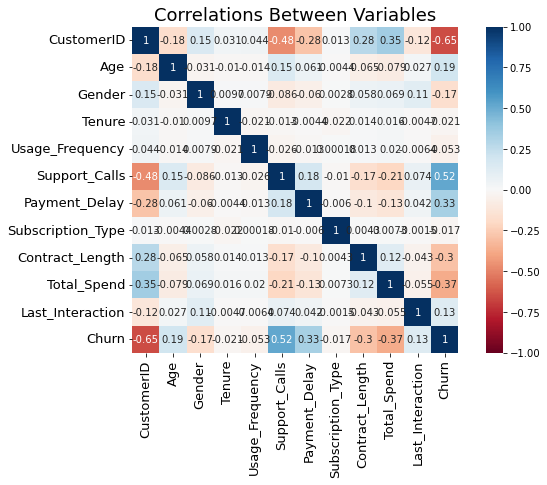

In [26]:
# Multivariate Analysis

plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

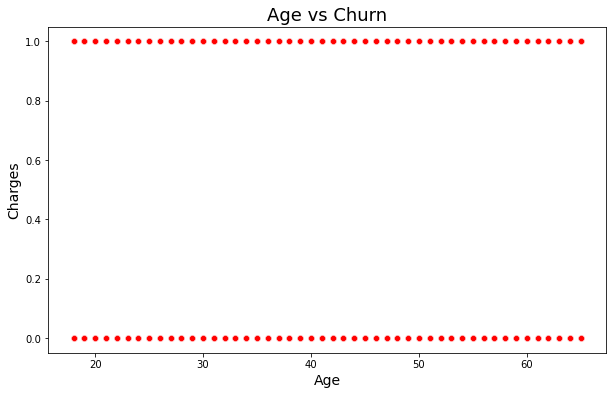

In [27]:
# Bivariate Analysis
plt.figure(figsize = (10,6))
sns.scatterplot(x='Age',y='Churn',color='r',data=data)
plt.title('Age vs Churn',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

In [28]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage_Frequency',
       'Support_Calls', 'Payment_Delay', 'Subscription_Type',
       'Contract_Length', 'Total_Spend', 'Last_Interaction', 'Churn'],
      dtype='object')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


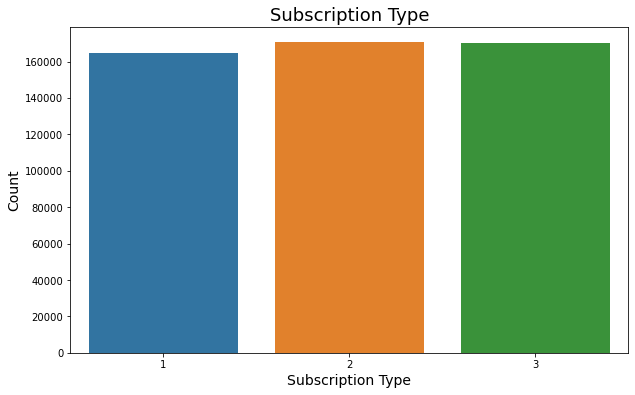

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(data.Subscription_Type)
plt.title('Subscription Type',size=18)
plt.xlabel('Subscription Type',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [44]:
data[data['Gender']== 1]['Gender'].count()

280273

In [46]:
data[data['Subscription_Type']== 2]['Subscription_Type'].count()

170630

In [56]:
new_customer = data[(data['Tenure'] <= 10) | (data['Total_Spend'] <= 500)]

In [53]:
new_customer

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
2,4.0,55.0,0,14.0,4.0,6.0,18.0,1,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
5,8.0,51.0,1,33.0,25.0,9.0,26.0,3,3,129.0,8.0,1.0
7,10.0,55.0,0,37.0,8.0,4.0,15.0,3,3,445.0,30.0,1.0
9,12.0,64.0,0,3.0,25.0,2.0,11.0,2,2,415.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505197,64365.0,48.0,0,36.0,22.0,4.0,22.0,3,3,342.0,9.0,1.0
505198,64366.0,26.0,0,54.0,24.0,2.0,21.0,1,3,165.0,23.0,1.0
505201,64369.0,45.0,1,3.0,1.0,5.0,11.0,2,3,218.0,15.0,1.0
505203,64371.0,37.0,1,6.0,1.0,5.0,22.0,2,3,923.0,9.0,1.0


In [57]:
churned, notchurned = data[data['Churn'] == 1.0]['Churn'].count(), data[data['Churn'] == 0.0]['Churn'].count()

In [58]:
size = [churned, notchurned]
labels = ["Churned", "Not Churned"]

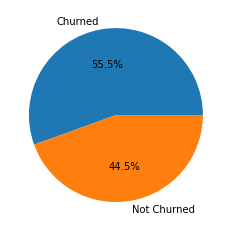

In [62]:
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.show()